# Mistakes on a Plane

Many of us love traveling, but fewer love delays (except for those iconoclasts out there who do – if that's you, power to you). Many of us have also given up on understanding _why_ delays happen, becuase they're effectively unpredictable in the practical realm. But what about _how_ delays happen?

<img src="gifs/plane1.gif" width=420px>

This notebook is going to walk through a bunch of different angles on flight delays: airports, airlines, routes, legs, sleepy, dopey, bashful, sne...wait sorry, lost track. Let's just get started.

In [1]:
#Import 'dem packages tho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[Our data comes from the U.S. Department of Transportation](https://www.kaggle.com/usdot/flight-delays/version/1#flights.csv), with special thanks to Kaggle for procuring it. It covers more than **5 Million flights from 2015** across the year. This analysis assumes that whatever happened in 2015 is representative of, well, reality: or in other words, _what happens in 2015 doesn't stay in 2015_.

The data comes in three files: a flights CSV file (the bulk of our data), an airports CSV file (for names and locations), and an airlines CSV file (for full names).

In [2]:
#Read in flights data
flights = pd.read_csv("flights.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Read in airports data
airports = pd.read_csv("airports.csv")

#Read in airlines data
airlines = pd.read_csv("airlines.csv")

For ordering purposes later, we'll need to convert the date format we were given (three separate columns for year, month, day) into a single date object.

In [4]:
#Convert date columns into single data
flights["TIMESTAMP"] = pd.to_datetime(flights[["YEAR", "MONTH", "DAY"]])

Here are the final columns and datatypes that we have to work with:

In [6]:
flights.dtypes

YEAR                            int64
MONTH                           int64
DAY                             int64
DAY_OF_WEEK                     int64
AIRLINE                        object
FLIGHT_NUMBER                   int64
TAIL_NUMBER                    object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE             int64
DEPARTURE_TIME                float64
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
AIR_TIME                      float64
DISTANCE                        int64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL               int64
ARRIVAL_TIME                  float64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
CANCELLATION_REASON            object
AIR_SYSTEM_D

Let's get started. Our first victim: airlines. Let us remind you before we begin: please keep your seat in the upright position, as well as ensure that your seatback tray is stowed. Flash photography is prohibited, but screenshots and social shares are encouraged.

### Delays by Airline

TLDR; some airlines are more on-time than others. And, as you've no doubt experienced, some airlines care more than others.

<img src="gifs/plane3.gif" width=420px>

In [7]:
#Group data by airline code and take the average arrival delay for each, then sort by delay
delays_by_code = flights.groupby("AIRLINE").agg({"ARRIVAL_DELAY": np.mean}).sort_values("ARRIVAL_DELAY", ascending=False)

#Join grouped data with airline dataframe to get airline name
delays_by_airline = pd.merge(delays_by_code, airlines, left_index=True, right_on="IATA_CODE")[["AIRLINE","ARRIVAL_DELAY"]]

#Set index as airline and display results
delays_by_airline.set_index("AIRLINE")

,ARRIVAL_DELAY
AIRLINE,
Spirit Air Lines,14.471800
Frontier Airlines Inc.,12.504706
JetBlue Airways,6.677861
Atlantic Southeast Airlines,6.585379
American Eagle Airlines Inc.,6.457873
Skywest Airlines Inc.,5.845652
United Air Lines Inc.,5.431594
Virgin America,4.737706
Southwest Airlines Co.,4.374964


Average delay is one metric, but once you've crossed the "delayed" line, the extremity of said delay seems to bother people less (or maybe not, but I need some sort of narrative here). How do different airlines fare by _percentage of flights_ that get delayed?

In [8]:
#Create new boolean column that represents if a flight was delayed on arrival or not
flights["DELAYED_ON_ARRIVAL"] = flights["ARRIVAL_DELAY"] > 0

In [12]:
#Group data by airline code and take the mean of our new delayed column, and sort by percentage delayed
delayed_by_code = flights.groupby("AIRLINE").agg({"DELAYED_ON_ARRIVAL": np.mean}).sort_values("DELAYED_ON_ARRIVAL", ascending=False)

#Join on airlines dataframe to get full name
delayed_by_airline = pd.merge(delayed_by_code, airlines, left_index=True, right_on="IATA_CODE")[["AIRLINE", "DELAYED_ON_ARRIVAL"]]

#Set index on airline and display results
delayed_by_airline.set_index("AIRLINE")

,DELAYED_ON_ARRIVAL
AIRLINE,
Spirit Air Lines,0.484644
Frontier Airlines Inc.,0.453917
Hawaiian Airlines Inc.,0.395676
Virgin America,0.390611
US Airways Inc.,0.383892
JetBlue Airways,0.381946
Skywest Airlines Inc.,0.378064
Southwest Airlines Co.,0.373075
Atlantic Southeast Airlines,0.372772


In a shocking set of results, Delta seems to be the _most_ on time airline in this dataset. They say part of being a Data Scientist is admitting when you're wrong, so my conclusion is... that this data must be falsified. 

But, of course, the final award here goes to Spirit Airlines, the operator that manages to let _HALF_ (HALF!) of their flights get delayed. There's an old adage in, well, every industry: you get what you pay for. 

### Delays by Airports

TLDR; there are some truly awful airports in the delays department. Consider spending the time you'll have to kill entertaining other airport guests.

<img src="gifs/plane2.gif" width=420px>

Here are the slowest airports as origin locations: planes that take off from here tend to arrive conspicuously late.

In [13]:
#Group by origin airport and take average arrival delay, and sort by delay
delays_by_origin_code = flights.groupby("ORIGIN_AIRPORT").agg({"ARRIVAL_DELAY": np.mean}).sort_values("ARRIVAL_DELAY", ascending=False)

#Merge with airports dataframe to get full name and state
delays_by_origin = pd.merge(delays_by_origin_code, airports, left_index=True, right_on="IATA_CODE")[["ARRIVAL_DELAY", "AIRPORT", "STATE"]]

#Display top 10 results
delays_by_origin.head(10)

,ARRIVAL_DELAY,AIRPORT,STATE
154,24.063158,Wilmington Airport,DE
133,21.763158,Gustavus Airport,AK
246,21.500000,Pago Pago International Airport (Tafuna Airport),AS
293,19.558442,St. Cloud Regional Airport,MN
40,16.154696,Jack Brooks Regional Airport (Southeast Texas ...,TX
19,15.492492,Aspen-Pitkin County Airport,CO
231,14.333333,Southwest Oregon Regional Airport (North Bend ...,OR
219,12.980488,Martha's Vineyard Airport,MA
97,12.401503,Eagle County Regional Airport,CO
305,11.990256,Trenton Mercer Airport,NJ


Wilmington, Delaware is the most delayed airport to leave from (on average). Probably because all of the businesses in the U.S. are based there, so everyone is traveling in and out.

<img src="gifs/humor.gif" width=420px>

Sorry, I'll stop making jokes. For a bit.

Here are delays organized by destination airport: if you're flying into these airports, you might be late.

In [14]:
#Group by destination airport and take average arrival delay, and sort by delay
delays_by_destination_code = flights.groupby("DESTINATION_AIRPORT").agg({"ARRIVAL_DELAY": np.mean}).sort_values("ARRIVAL_DELAY", ascending=False)

#Merge with airports dataframe to get full name and state
delays_by_destination = pd.merge(delays_by_destination_code, airports, left_index=True, right_on="IATA_CODE")[["ARRIVAL_DELAY", "AIRPORT", "STATE"]]

#Display top 10 results
delays_by_destination.head(10)

,ARRIVAL_DELAY,AIRPORT,STATE
293,23.025974,St. Cloud Regional Airport,MN
154,21.989474,Wilmington Airport,DE
305,17.433901,Trenton Mercer Airport,NJ
137,17.320242,Guam International Airport,GU
231,16.740602,Southwest Oregon Regional Airport (North Bend ...,OR
212,16.152027,Sawyer International Airport,MI
19,15.829448,Aspen-Pitkin County Airport,CO
234,15.288256,Plattsburgh International Airport,NY
40,14.631694,Jack Brooks Regional Airport (Southeast Texas ...,TX
42,12.192771,Rafael Hernández Airport,PR


Just don't fly in or out of Wilmington. That seems to be the lesson here.

### Delays by Day of Week

<img src="gifs/office.gif" width=420px>

TLDR; You wouldn't think this is logical off the bat, but turns out there's a lot of variation in arrival delays by day of the week.

In [40]:
#Group by day of week, take average arrival delay, and sort by arrival delay
delays_by_dow = flights.groupby("DAY_OF_WEEK").agg({"ARRIVAL_DELAY": np.mean, "DELAYED_ON_ARRIVAL": np.mean}).sort_values("ARRIVAL_DELAY", ascending=False)

#Display results
delays_by_dow

,ARRIVAL_DELAY,DELAYED_ON_ARRIVAL
DAY_OF_WEEK,,
1,6.002063,0.363908
4,5.668334,0.384587
5,4.764079,0.378585
2,4.246041,0.349480
7,3.958293,0.349492
3,3.845468,0.355521
6,1.852892,0.320717


There doesn't seem to be any particular rhyme or reason to it, but there is some variation: for example, flights on Wednesday are 20% more likely to be delayed than flights on Saturday. Flights are delayed the most (on average) on Sunday.

### Delays by Distance

TLDR; distance has no correlation with arrival delays.

<img src="gifs/dog.gif" width=420px>

Do flights that span longer get delayed more often? They'll generally require more prep and turnover time, which can compound delays. Let's start with a plot and then investigate correlations.

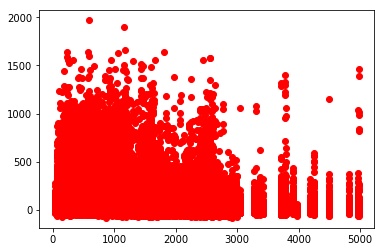

In [18]:
plt.scatter(flights["DISTANCE"], flights["ARRIVAL_DELAY"], color="red")

Too many points to interpret. Are the two correlated though?

In [36]:
flights[["DISTANCE", "ARRIVAL_DELAY"]].corr()

,DISTANCE,ARRIVAL_DELAY
DISTANCE,1.000000,-0.025444
ARRIVAL_DELAY,-0.025444,1.000000


Nope, turns out they're not. I have two theories for why:

* Airtime delays rarely impact arrival delays
* Longer flights mean fewer legs, which means more leeway for errors in between legs

We'll cover both of these more in depth below.

### Delays by Type

TLDR; departure delays don't correlate perfectly with arrival delays, and airtime delays don't correlate with either.

<img src="gifs/landing.gif" width=420px>

The core truth about _how_ plane delays happen is that there are multiple failure points: taxi time, taking off late, flying for too long, arriving late, you name it. Our dataset is fairly limited in scope, and [most reports hailing the taxi as the culprit focus on growth and ignore absolute impact](https://www.nbcnews.com/business/travel/real-reason-flying-takes-longer-airport-taxi-times-keep-growing-n468121). 

We'll do a fairly simple analysis and see if certain delays correlate with others.

In [19]:
#Create a new column for airtime delay
flights["AIRTIME_DELAY"] = flights["SCHEDULED_TIME"] - flights["ELAPSED_TIME"]

In [20]:
#Display correlations for the 3 types of available delays in our data
flights[["DEPARTURE_DELAY", "AIRTIME_DELAY", "ARRIVAL_DELAY"]].corr()

,DEPARTURE_DELAY,AIRTIME_DELAY,ARRIVAL_DELAY
DEPARTURE_DELAY,1.000000,-0.016203,0.944672
AIRTIME_DELAY,-0.016203,1.000000,-0.343282
ARRIVAL_DELAY,0.944672,-0.343282,1.000000


Looks like there's a high correlation between ARRIVAL_DELAY and DEPARTURE_DELAY, which isn't surprising: but it is interesting to note that the correlation isn't perfect, which means that departure delays don't _always_ lead to arrival delays. That's because flight times are flexible, and the airline will often shorten the flight time by 20-30 minutes to make up for departure delays.

It's also worth noting that there's no correlation between delays in AIR_TIME and ARRIVAL_DELAY – which means that you probably can't attribute arriving late to too much time in the sky. Or in the words of Mr. Meeseegs: 

<img src="gifs/meeseegs.gif" width="400px">

### Delays by route

<img src="gifs/route.gif" width="400px">

For those frequent travelers among us, you already know that delays can be highly route dependent. We'll move some data around to create routes, and see which are delayed the heaviest.

In [24]:
#Function to convert integer values in origin airport
def convertAirport(airport):
    if type(airport) == int:
        return "N/A"
    else:
        return airport

In [25]:
#Apply integer conversion to origin and destination airports
flights["ORIGIN_AIRPORT"] = flights["ORIGIN_AIRPORT"].apply(lambda x: convertAirport(x))
flights["DESTINATION_AIRPORT"] = flights["DESTINATION_AIRPORT"].apply(lambda x: convertAirport(x))

In [26]:
#Create new routes column
flights["ROUTE"] = flights["ORIGIN_AIRPORT"] + "_" + flights["DESTINATION_AIRPORT"]

In [30]:
#Group by route and take average delay as well as number of flights, and sort by average delay
delays_by_route_raw = flights.groupby("ROUTE").agg({"ARRIVAL_DELAY": np.mean, "DELAYED_ON_ARRIVAL": np.mean, "FLIGHT_NUMBER": np.size}).sort_values("ARRIVAL_DELAY", ascending=False).reset_index()

#Filter for routes that have more than 100 flights in the dataset, and remove N/A data as defined above
delays_by_route = delays_by_route_raw[(delays_by_route_raw["FLIGHT_NUMBER"] > 100) & (delays_by_route_raw["ROUTE"] != "N/A_N/A")]

#Rename columns for readability
delays_by_route.columns = ["ROUTE", "AVG_DELAY", "PCT_DELAYED", "COUNT"]

In [31]:
#Sort and display results
delays_by_route.sort_values("AVG_DELAY", ascending=False).head(10)

,ROUTE,AVG_DELAY,PCT_DELAYED,COUNT
279,ASE_DFW,39.965649,0.483582,335
303,JFK_EGE,38.009524,0.427273,110
353,OAK_IAH,34.028736,0.692737,179
407,ACY_DTW,30.896552,0.551020,147
417,MSP_TTN,30.225166,0.687898,157
418,SRQ_LGA,30.169048,0.542725,433
426,CRW_DFW,29.615942,0.616438,146
428,ACY_BOS,29.422222,0.642857,182
446,EGE_ORD,28.931373,0.394495,109
447,DFW_OGG,28.856566,0.646825,504


Here's something interesting: DFW (Dallas Fort Worth) appears in 4 of the most delayed (on average) routes, despite not being in the top 10 most delayed airports (origin or destination) itself.  

### Delays by Leg

<img src="gifs/leg.jpg" width="400px">

Planes travel on legs: one flight will travel pretty much nonstop to a few different cities every day, and then do the same thing the next day. Do legs flown later in the day tend to be more delayed, as delays pile up?

In [33]:
#Sort flights by TAIL_NUMBER and TIMESTAMP
flights_sorted = flights.sort_values(["TAIL_NUMBER", "TIMESTAMP"])

In [34]:
#Create new column that represents the difference between a row's day and the previous row's day
flights_sorted["DAY_DIFF"] = flights_sorted["DAY"].diff()

#Create new column that represents the difference between a row's TAIL_NUMBER and the previous row's TAIL_NUMBER
flights_sorted["TAIL_DIFF"] = flights_sorted["TAIL_NUMBER"].ne(flights_sorted["TAIL_NUMBER"].shift()).astype(int)

In [35]:
#Define a function to calculate a given row's leg linearly
def calculateLeg(row):
    
    #Persist state of leg_counter outside of function
    global leg_counter
    
    #If the day and flight are the same as last:
    if ((row["DAY_DIFF"] == 0) & (row["TAIL_DIFF"] == 0)):
        leg_counter +=1
        return int(leg_counter)
        
    #If either the day or flight are different, reset the leg_counter    
    else:
        leg_counter = 1
        return int(leg_counter)

In [37]:
%%time
#"You can't measure what you can't improve" – Grove Andy

#Set leg_counter at 1
leg_counter = 1

#Apply our calculate leg function to create a new LEG column
flights_sorted["LEG"] = flights_sorted.apply(lambda x: calculateLeg(x), axis=1)

CPU times: user 2min 19s, sys: 10.6 s, total: 2min 30s
Wall time: 2min 33s


In [39]:
#Group by LEG, and take average arrival delay and pct delayed, and sort by LEG
legs = flights_sorted.groupby("LEG").agg({"ARRIVAL_DELAY": np.mean, "DELAYED_ON_ARRIVAL": np.mean}).sort_values("LEG")[:10]
legs

,ARRIVAL_DELAY,DELAYED_ON_ARRIVAL
LEG,,
1,-0.231296,0.283436
2,2.442736,0.337547
3,4.471537,0.362935
4,6.860264,0.399990
5,8.891809,0.420608
6,9.915047,0.432314
7,12.654264,0.463797
8,11.252219,0.440556
9,14.263179,0.491407


The relationship is uncanny. The average delays and percentage of flights delayed increase almost perfectly linearly with the number leg than an aircraft is on during a given day. Planes rarely fly more than 9 legs a day, so we're ignoring anomalies and data issues here.

<img src="gifs/finished.gif" width="400px">

I hope you enjoyed this flight through this cool dataset, and have a better understanding of how delays actually happen. If you liked this, feel free to share it in whatever way you so choose. For feedback, hit me up on [Twitter](https://twitter.com/jGage718).